# **Survey Study Notebook**

### Objectives
* Load survey data
* Explore the data
* Find colleration so that we can understand the most important variables

### Inputs
* General Dataset: outputs/datasets/collection/BreakfastSurvey.csv

### Outputs
* Generate code that aswers business requrement 1 and can be used to build the Streamlit App

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

---

## Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv")
df.head(3)

,appearance,breakfast,service,staff,variety,price,taste,hotel
0,1,No,5,2,1,2,2,2
1,4,No,4,3,6,6,6,6
2,1,No,6,4,1,1,1,1


## Data Exploration
Check variable type and distribution, missing levels

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

## Correlation Study

Converting `breakfast` to nummerical

In [5]:
df["breakfast"] = df["breakfast"].replace({"Yes, again":2,
                                           "Yes, next time not":1,
                                           "No":0
                                           })

/tmp/ipykernel_1365/954375868.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["breakfast"] = df["breakfast"].replace({"Yes, again":2,


Check `breakfast` data type

In [6]:
df["breakfast"].dtype

dtype('int64')

We inspect the spearman correlation

In [7]:
corr_spearman = df.corr(method='spearman')["breakfast"].sort_values(key=abs, ascending=False).drop("breakfast")
corr_spearman

staff         0.409830
service       0.365393
hotel         0.217508
appearance    0.209394
price         0.186338
taste         0.179926
variety       0.123968
Name: breakfast, dtype: float64

Then we inspect the pearson correlation as well

In [8]:
corr_pearson = df.corr(method="pearson")["breakfast"].sort_values(key=abs, ascending=False).drop("breakfast")
corr_pearson

staff         0.474098
service       0.369812
hotel         0.223690
appearance    0.193985
price         0.183205
taste         0.173026
variety       0.054705
Name: breakfast, dtype: float64

We have a medium correlation between the staff and the the breakfast column it looks like this is the most important correlation for us

In [ ]:
df[df["breakfast"]==0]["staff"]


0    2
1    3
2    4
Name: staff, dtype: int64

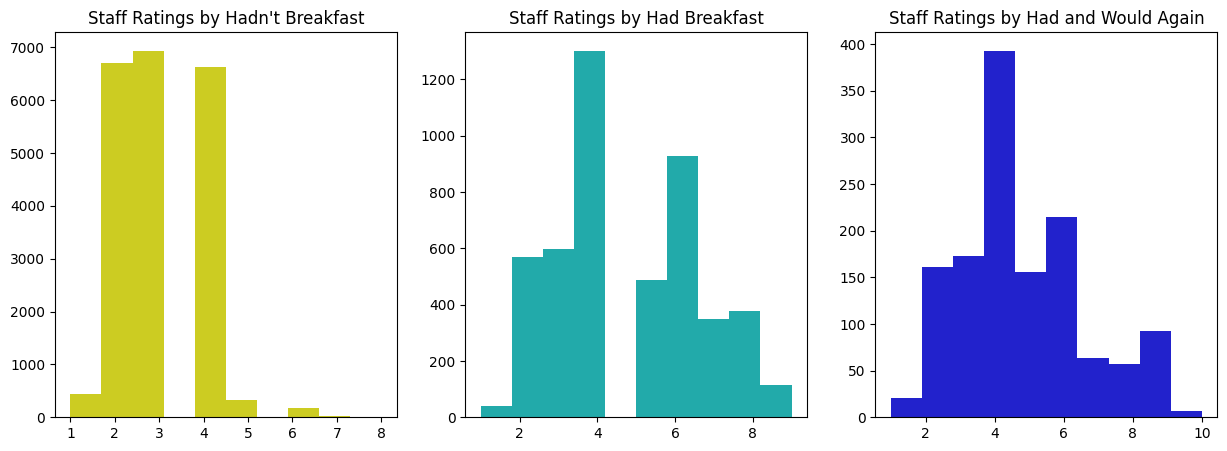

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axes[0].hist(df[df["breakfast"]==0]["staff"], bins=10, color="#CCCC22")
axes[0].set_title("Staff Ratings by Hadn't Breakfast")

axes[1].hist(df[df["breakfast"]==1]["staff"], bins=10, color="#22AAAA")
axes[1].set_title("Staff Ratings by Had Breakfast")

axes[2].hist(df[df["breakfast"]==2]["staff"], bins=10, color="#2222CC")
axes[2].set_title("Staff Ratings by Had and Would Again")
plt.show()

Let's see the distrobution normalized by rows

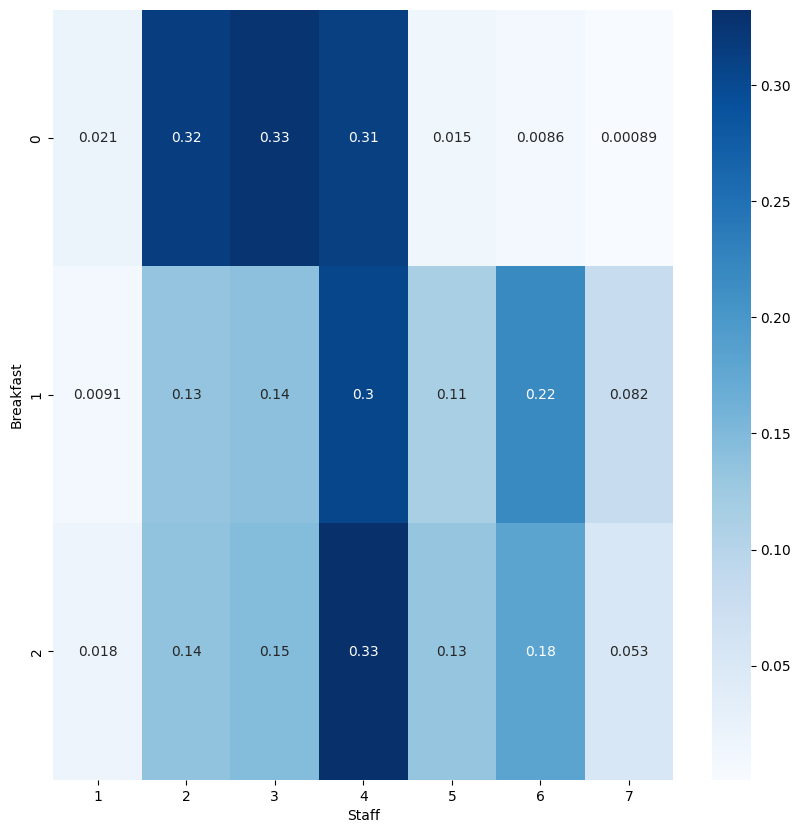

In [20]:

df_count = pd.DataFrame()

for breakfast_value in range(0,3):
    df_2 = df[df["breakfast"] == breakfast_value]
    for staff_value in range(1,8):
        df_count.at[breakfast_value, staff_value] = df_2[df_2["staff"]==staff_value].shape[0]
    

cum = df_count.cumsum(axis=1)
cum = cum.iloc[:,-1]

for row in range(0,3):
    for column in df_count:
        df_count.at[row, column] = df_count.at[row, column]/cum.at[row]

fig, axes = plt.subplots(figsize=(10,10))

sns.heatmap(df_count, annot=True, cmap="Blues", ax=axes)

plt.xlabel("Staff")
plt.ylabel("Breakfast")

plt.show()